# print accuracy and loss

In [1]:
# Task_1_recover_script was used to recover LSTM and GRU models, the recovery will be special by passing arguments
import subprocess
import os

# this is the file used to store the result from recovery
with open ("../models/Task_2_recover.txt", "w") as txtfile:
    print("", file = txtfile)

for unit_name in ["GRU"]:
    for mode in ["32", "64", "128", "stack_32"]:
        print("recovering {}, {}".format(unit_name, mode))
        try:
            os.system("CUDA_VISIBLE_DEVICES=0 python Task_2_recover_script.py {} {}".format(unit_name, mode))
        except:
            pass


with open ("../models/Task_2_recover.txt", "r") as txtfile:
    for i in txtfile.readlines():
        print(i)

recovering GRU, 32
recovering GRU, 64
recovering GRU, 128
recovering GRU, stack_32


GRU  32      , test accuracy = 0.962392, test loss = 0.092284, train accuracy = 0.962106, train loss = 0.093108

GRU  64      , test accuracy = 0.965334, test loss = 0.085415, train accuracy = 0.965030, train loss = 0.086210

GRU  128     , test accuracy = 0.968505, test loss = 0.077635, train accuracy = 0.968301, train loss = 0.078176

GRU  stack_32, test accuracy = 0.964947, test loss = 0.086036, train accuracy = 0.964700, train loss = 0.086765



# plot learning curves

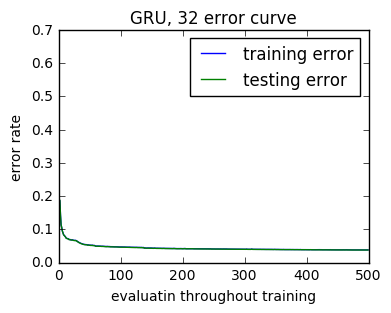

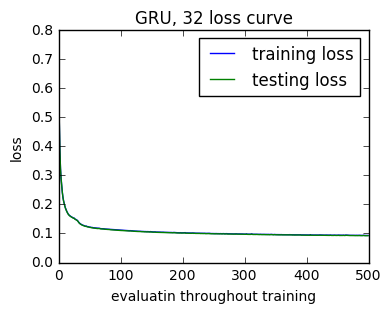

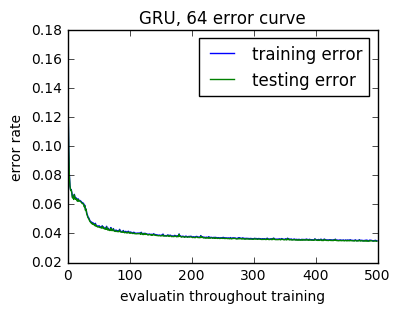

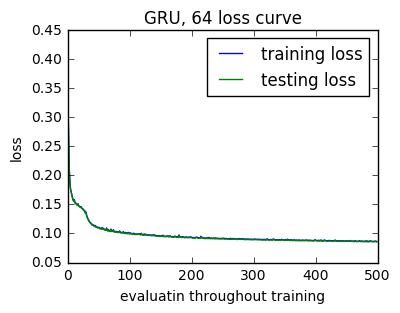

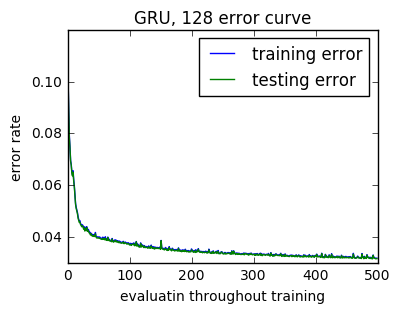

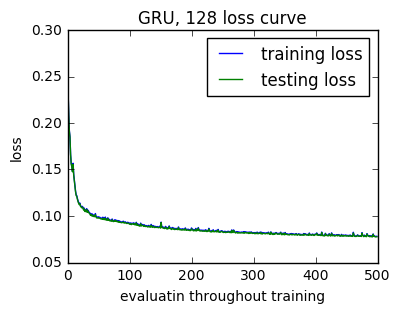

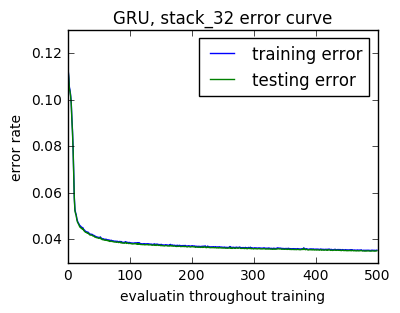

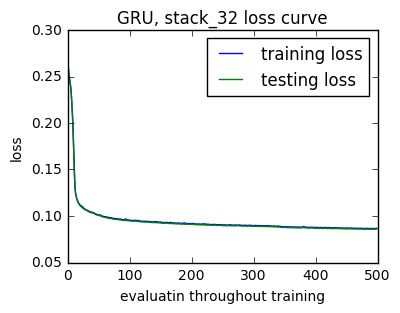

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.ops import rnn, rnn_cell
import random
import time
import os
import numpy as np
import matplotlib.pyplot as plt
from pylab import savefig

def get_learning_curve(unit_name, mode):
    train_error_list = np.load("../models/pixel_{}_{}_train_error_list.npy".format(unit_name, mode))
    test_error_list = np.load("../models/pixel_{}_{}_test_error_list.npy".format(unit_name, mode))
    train_loss_list = np.load("../models/pixel_{}_{}_train_loss_list.npy".format(unit_name, mode))
    test_loss_list = np.load("../models/pixel_{}_{}_test_loss_list.npy".format(unit_name, mode))
    return train_error_list, test_error_list, train_loss_list, test_loss_list

for unit_name in ["GRU"]:
    for mode in ["32", "64", "128", "stack_32"]:
        try:
            train_error_list, test_error_list, train_loss_list, test_loss_list = get_learning_curve(unit_name, mode)
            plt.figure(num=None, figsize=(4, 3), dpi=128, facecolor='w', edgecolor='k')
            plt.plot(train_error_list)
            plt.plot(test_error_list)
            plt.title("{}, {} error curve".format(unit_name, mode))
            plt.ylabel("error rate")
            plt.xlabel("evaluatin throughout training")
            plt.legend(["training error", "testing error"])
            plt.show()
#             savefig("./image/pixel_{}_{}_error_curve.png".format(unit_name, mode))
    
            plt.figure(num=None, figsize=(4, 3), dpi=128, facecolor='w', edgecolor='k')
            plt.plot(train_loss_list)
            plt.plot(test_loss_list)
            plt.title("{}, {} loss curve".format(unit_name, mode))
            plt.ylabel("loss")
            plt.xlabel("evaluatin throughout training")
            plt.legend(["training loss", "testing loss"])
#             savefig("./image/pixel_{}_{}_loss_curve.png".format(unit_name, mode))

            plt.show()
        except:
            pass

In [3]:
# a = """
# \\begin{figure}[H]
# """

# c = """
# \\end{figure}
# """

# for unit_name in ["GRU"]:
#     for mode in ["32", "64", "128", "stack_32"]:
#         b = "\\caption{" + "pixel prediction {} {} error curve".format(unit_name, mode.replace("_", " ")) + "}\n"
#         b += "\\includegraphics[scale=.8]{" + "pixel_{}_{}_error_curve.png".format(unit_name, mode) + "}\n\\centering"
#         print(a + b + c)
#         b = "\\caption{" + "pixel prediction {} {} loss curve".format(unit_name, mode.replace("_", " ")) + "}\n"
#         b += "\\includegraphics[scale=.8]{" + "pixel_{}_{}_loss_curve.png".format(unit_name, mode) + "}\n\\centering"
#         print(a + b + c)

In [2]:
# import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data
# from tensorflow.python.ops import rnn, rnn_cell
# import random
# import time
# import os
# import numpy as np
# import matplotlib.pyplot as plt

# def get_learning_curve(unit_name, mode):
#     train_error_list = np.load("../models/pixel_{}_{}_train_error_list.npy".format(unit_name, mode))
#     test_error_list = np.load("../models/pixel_{}_{}_test_error_list.npy".format(unit_name, mode))
#     train_loss_list = np.load("../models/pixel_{}_{}_train_loss_list.npy".format(unit_name, mode))
#     test_loss_list = np.load("../models/pixel_{}_{}_test_loss_list.npy".format(unit_name, mode))
#     return train_error_list, test_error_list, train_loss_list, test_loss_list

# for mode in ["32", "64", "128", "stack_32"]:
#     plt.figure(num=None, figsize=(4, 3), dpi=128, facecolor='w', edgecolor='k')
#     for unit_name in ["GRU", "LSTM"]:
#         try:
#             train_error_list, test_error_list, train_loss_list, test_loss_list = get_learning_curve(unit_name, mode)
#             plt.plot(test_error_list)
#         except:
#             pass
#     plt.ylabel("error rate")
#     plt.xlabel("evaluatin throughout training")
#     plt.title("{}, {} error curve".format("GRU_LSTM", mode))
#     plt.legend(["GRU", "LSTM"])
#     plt.show()
